# WARPS X-ray Luminosity Function

Based on the work in Koens 2013, we aim to recreate the WARPS X-ray Luminosity Function (XLF) and observe the excess of galaxy clusters in the nearby universe at L ~ $2 \times 10^{43}$ erg/s

The XLF, conventionally given the symbol $\phi$, is the comoving number density $n$ of objects per luminosity interval:

$$\phi(L_{\text{X}},z) = \frac{\mathrm{d}n(L_{\text{X}},z)}{\mathrm{d}L_{\text{X}}}$$

The Schechter function is the canonical, parametric representation of the luminosity function:

$$\phi(L_{\text{X}},z)\mathrm{d}L_{\text{X}} = \phi^*\left(\frac{L_{\text{X}}}{L^*_{\text{X}}}\right)^{-\alpha} \exp\left(-\frac{L_{\text{X}}}{L^*_{\text{X}}}\right)\left(\frac{\mathrm{d}L_{\text{X}}}{L^*_{\text{X}}}\right)$$

where the parameter $\phi^*$ normalises the XLF, and $\alpha$ determines the steepness at $L_{\text{X}} < L_{\text{X}}^*$.

## Table of Contents

1. [Imports](#1-imports)
2. [Luminosity - redshift plot](#2-luminosity---z-plot)
3. [Selection Function](#3-selection-function)
4. [Calculating number densities](#4-calculating-number-densities)
   - [4a. V_max method](#4a-v_textmax-method)
   - [4b. Page-Carrera method](#4b-page-carrera-method)
5. [Plot XLF](#5-plot-xlf)
6. [Expected vs Observed numbers](#6-expected-vs-observed-numbers)

## Table of Contents

1. [Imports](#1-imports)
2. [Luminosity - redshift plot](#2-luminosity---z-plot)
3. [Selection Function](#3-selection-function)
4. [Calculating number densities](#4-calculating-number-densities)
   - [4a. V_max method](#4a-v_textmax-method)
   - [4b. Page-Carrera method](#4b-page-carrera-method)
5. [Plot XLF](#5-plot-xlf)
6. [Expected vs Observed numbers](#6-expected-vs-observed-numbers)

## 1. Imports

In [1]:
import pandas as pd

# Load the XLF data from Table 2 in Koens 2013
XLF = pd.read_csv('data/koens_2013/tab1_0p02z0p3.csv', header=0)
print(XLF.head())

# Load the WARPS sample used by Koens 2013
Lx_z = pd.read_csv('data/koens_2013/warps_xlf.dat', delim_whitespace=True, header=0)
print(Lx_z.head())

   Lx_centre       phi phi_plus_1sigma phi_minus_1sigma  N_obs z_tilde Lx_mean
0      0.011  2.26 e-3        7.46 e-2         3.91 e-4    1.0   0.051    0.01
1      0.016  1.14 e-3        2.64 e-2         4.04 e-4    2.0   0.063   0.015
2      0.022  2.33 e-4        7.69 e-4         4.03 e-3    1.0   0.107   0.025
3      0.031  3.46 e-4        6.20 e-4         1.80 e-4    4.0   0.125   0.032
4      0.044  1.33 e-4        2.38 e-4         6.94 e-5    4.0   0.119   0.043
         Lx      z     Lxerr
0  0.031099  0.029  0.001703
1  0.014380  0.045  0.001669
2  0.009963  0.051  0.000585
3  0.043801  0.080  0.002972
4  0.015892  0.081  0.001483


C:\Users\LilyO\AppData\Local\Temp\ipykernel_22288\2564881406.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Lx_z = pd.read_csv('data/koens_2013/warps_xlf.dat', delim_whitespace=True, header=0)


## 2. Luminosity - z plot

First lets investigate the data by plotting the Luminosity - z distribution of the sample, recreating:

![WARPS/REFLEX L-z Distribution](figures/koens_2013/warps_reflex_lz.png)

In [2]:
Lx = Lx_z["Lx"]
z = Lx_z["z"]

In [3]:
import matplotlib.pyplot as plt

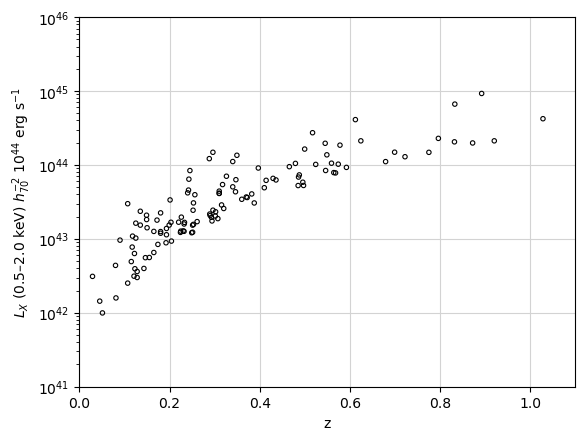

In [4]:
plt.scatter(Lx_z["z"], Lx_z["Lx"]*1e44, facecolors = 'none', edgecolors = 'black', s = 10, linewidth = 0.8, zorder = 3)
plt.yscale("log")
plt.xlabel("z")
plt.ylabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.grid(True, color = 'lightgrey', zorder = 0)
plt.xlim(0, 1.1)
plt.ylim(1e41, 1e46)
plt.savefig("figures/WARPS_clusters_Lx-z.png")
plt.show()

## 5. Plot XLF

We want to plot our XLF and compare with Schechter lines to recreate:

![XLF Plot with Page-Carrera Local and Accelerated](figures/koens_2013/XLF_paca_local_acc.png)

In [5]:
Lx_c = XLF["Lx_centre"]
Lx_mean = XLF["Lx_mean"]
N_obs = XLF["N_obs"]
phi1 = XLF["phi"]
phi1 = XLF["phi"].str.replace(" ", "").astype(float)
phi1_uplim = XLF["phi_plus_1sigma"]
phi1_uplim = XLF["phi_plus_1sigma"].str.replace(" ", "").astype(float)
phi1_uplim[1] = 2.64e-3
phi1_downlim = XLF["phi_minus_1sigma"]
phi1_downlim = XLF["phi_minus_1sigma"].str.replace(" ", "").astype(float)
phi1_downlim[2] = 4.03e-5 # typo in table

In [6]:
phi1_up_standerr = (phi1_uplim - phi1)
phi1_down_standerr = (phi1 - phi1_downlim)
print(phi1_down_standerr[2])
print(phi1_down_standerr[1])

0.0001927
0.0007359999999999999


In [7]:
yerr = [phi1_down_standerr, phi1_up_standerr]


In [8]:
import numpy as np

[0.37469345 0.31845373 0.34294475 0.35020243 0.35894509 0.34550164
 0.33967737 0.347836   0.34930321 0.34666485 0.34648233 0.34666485
 0.34648233 0.34666485]


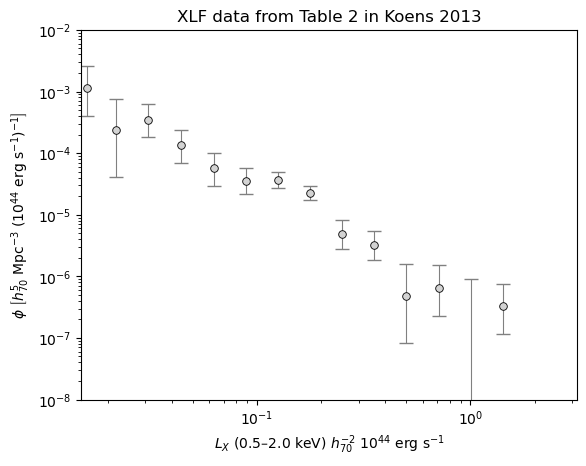

In [9]:
plt.errorbar(Lx_c, phi1, yerr, fmt='none', ecolor='gray', capsize=5, linewidth = 0.8, linestyle='None')
plt.scatter(Lx_c, phi1, facecolors = 'lightgrey', edgecolors = 'black', s = 30, linewidth = 0.6, zorder = 3)
plt.title("XLF data from Table 2 in Koens 2013") # error bars
plt.loglog()
plt.xlim(0.015, 10**0.5)
plt.ylim(1e-8, 1e-2)
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel(r"$\phi\ \left[h_{70}^{5}\ \mathrm{Mpc}^{-3}\ (10^{44}\ \mathrm{erg\ s}^{-1})^{-1}\right]$")
print(np.diff(np.log(Lx_c)))

In [10]:
REFLEX = pd.read_csv('data/koens_2013/REFLEX_zmedian.dat', header=0, delim_whitespace=True)

print(REFLEX.head())

C:\Users\LilyO\AppData\Local\Temp\ipykernel_22288\1600510832.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  REFLEX = pd.read_csv('data/koens_2013/REFLEX_zmedian.dat', header=0, delim_whitespace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'data/koens_2013/REFLEX_zmedian.dat'

In [ ]:
print(REFLEX.columns)

In [ ]:
R_Lx = REFLEX["Lx"]

In [ ]:
R_phi_star = 2.94
R_alpha = 1.690
R_Lx_star = 2.64
def R_schechterfunction(R_Lx, R_phi_star = 2.94, R_alpha = 1.690, R_Lx_star = 2.64):
    return (R_phi_star * ((R_Lx/R_Lx_star)**-R_alpha) * np.exp(-R_Lx/R_Lx_star) * 1/R_Lx_star)*1e-7
L = np.arange(1e-2, 1e2, 1e-2)
R_phi = R_schechterfunction(L)

In [ ]:
plt.plot(L, R_phi, color = "grey" , linewidth = 0.8, zorder = 3)
plt.title("Applying Schechter function to the REFLEX sample")
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-2)
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel(r"$\phi\ \left[h_{70}^{5}\ \mathrm{Mpc}^{-3}\ (10^{44}\ \mathrm{erg\ s}^{-1})^{-1}\right]$")

In [ ]:
plt.errorbar(Lx_c, phi1, yerr, fmt='none', ecolor='gray', capsize=5, linewidth = 0.8, linestyle='None')
plt.scatter(Lx_c, phi1, facecolors = 'lightgrey', edgecolors = 'black', s = 20, linewidth = 0.8, zorder = 3)
plt.plot(L, R_phi, color = "black" , linewidth = 0.6, zorder = 3)
plt.title("XLF and REFLEX data") 
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-2, 4)
plt.ylim(1e-8, 1e-2)
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel(r"$\phi\ \left[h_{70}^{5}\ \mathrm{Mpc}^{-3}\ (10^{44}\ \mathrm{erg\ s}^{-1})^{-1}\right]$")
plt.show()

## 3. Selection Function

$V_{\text{max}}$ denotes the maximum co-moving volume, given by 

$$V_{\text{max}} = \int_{z_{\text{min}}}^{z_{\text{max}}}\Omega(f_{\text{X}},r_{\theta})\frac{\mathrm{d}V(z)}{\mathrm{d}z}\mathrm{d}z$$

where $\Omega(f_{\text{X}},r_{\theta})$ is the sky coverage as a function of flux $f_{\text{X}}(L_{\text{X}},z)$ and angular extent $r_{\theta}(r_c,z)$ (here $r_c$ is the core radius of the cluster surface brightness distribution, conventionally parameterised with a $\beta$-model), and $\mathrm{d}V(z)/\mathrm{d}z$ is the differential, co-moving volume, which is strongly sensitive to the cosmological framework. The maximum co-moving volume is calculated for all $N$ galaxy clusters.

## 3a. Sky coverage, $\Omega(f_{\text{X}},r_{\theta})$

In [11]:
sf_flux = pd.read_csv('data/koens_2013/sf_fluxobex_rc100kpc.dat', delim_whitespace=True)
sf_flux.to_csv('data/koens_2013/sf_fluxobex_rc100kpc.csv', index=False)
print(sf_flux.columns)


Index(['flux', 'coverage'], dtype='object')


C:\Users\LilyO\AppData\Local\Temp\ipykernel_22288\4172310965.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sf_flux = pd.read_csv('data/koens_2013/sf_fluxobex_rc100kpc.dat', delim_whitespace=True)


In [12]:
#HACK assume fixed core r

In [13]:
coverage = sf_flux["coverage"]
coverage.head()
flux = sf_flux["flux"]
flux.head()

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
Name: flux, dtype: float64

(0.0, 105.0)

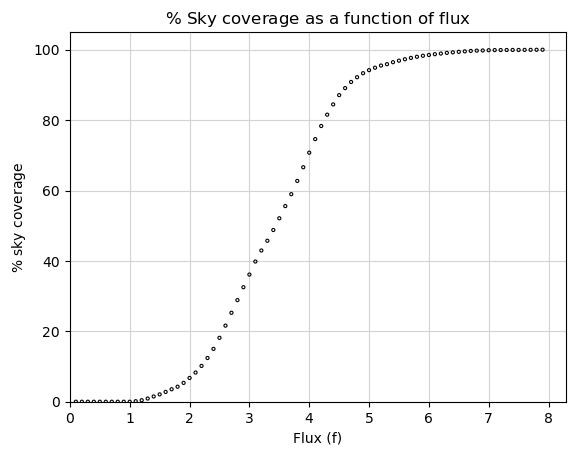

In [14]:
plt.scatter(flux, coverage, facecolors = 'none', edgecolors = 'black', s = 5, linewidth = 0.8, zorder = 3)
plt.title(r"$\%$ Sky coverage as a function of flux")
plt.xlabel("Flux (f)")
plt.ylabel(r"$\%$ sky coverage")
plt.grid(True, color = 'lightgrey', zorder = 0)
plt.xlim(0)
plt.ylim(0)

In [15]:
import scipy
from scipy import interpolate

In [16]:
f = interpolate.interp1d(flux, coverage)

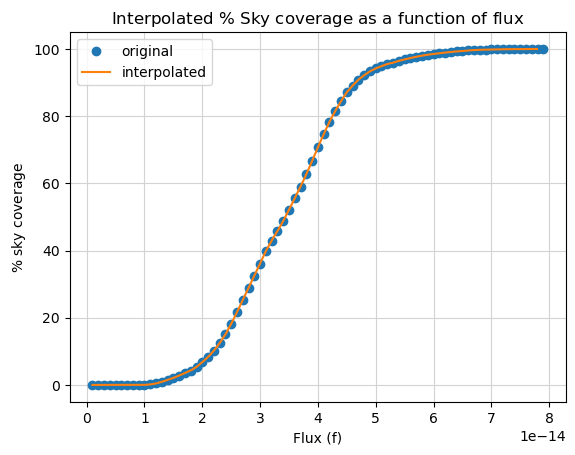

In [17]:
newflux = np.arange(0.1, 7.8, 0.01)
newcoverage = f(newflux)
plt.plot(flux*1e-14, coverage, 'o', label = "original")
plt.plot(newflux*1e-14, newcoverage, '-', label = "interpolated")
plt.title(r"Interpolated $\%$ Sky coverage as a function of flux")
plt.xlabel("Flux (f)")
plt.ylabel(r"$\%$ sky coverage")
plt.grid(True, color = 'lightgrey', zorder = 0)
plt.legend()
plt.show()

In [18]:
len(coverage), len(z)

(79, 124)

In [19]:
from astropy import units as u
from astropy.units import imperial

In [20]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=100 * u.km / u.s / u.Mpc, Om0=0.3)

In [21]:
Luminosity = 1e43
z_range = np.arange(0, 1, 0.01)
D_L_cm_range = cosmo.luminosity_distance(z_range).to(u.cm).value


In [22]:
flux_range = Luminosity / (4 * np.pi * D_L_cm_range**2)
flux_range = [i for i in flux_range if i < np.inf]


C:\Users\LilyO\AppData\Local\Temp\ipykernel_22288\4122029076.py:1: RuntimeWarning: divide by zero encountered in divide
  flux_range = Luminosity / (4 * np.pi * D_L_cm_range**2)


In [23]:
coverage_interp = np.interp(flux_range, flux*1e-14, coverage, left = 0, right = 100)

In [24]:
# plt.plot(flux_range, coverage_interp)
# plt.xscale("log")

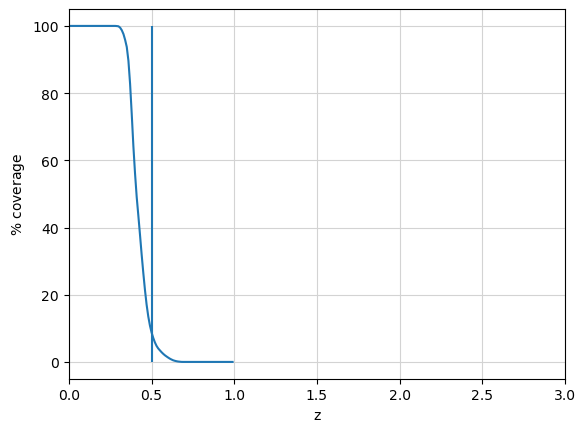

In [25]:
plt.plot(z_range[1:], coverage_interp)
plt.vlines(0.5, 0, 100)
plt.xlabel("z")
plt.ylabel(r"$\%$ coverage")
plt.xlim(0, 3)
plt.grid(True, color = 'lightgrey', zorder = 0)
plt.savefig("figures/coverage-z.png")
plt.show()

In [26]:
tot_cov = (70.9*u.deg**2).to(u.sr)
print("Total sky coverage in sr:", tot_cov)

Total sky coverage in sr: 0.02159737506287764 sr


In [27]:
coverage_interp = []
Luminosity = Lx_z["Lx"]
z_range = Lx_z["z"]
len(z_range)

124

## 3b. Differential, co-moving volume, $\frac{\mathrm{d}V(z)}{\mathrm{d}z}$

In [28]:
co_mo_vol_up = cosmo.differential_comoving_volume(0.3)
co_mo_vol_down = cosmo.differential_comoving_volume(0.02)
print(co_mo_vol_down, co_mo_vol_up)

10583683.341164734 Mpc3 / sr 1797580671.7936635 Mpc3 / sr


In [41]:
from scipy.integrate import quad

## 3c. Maximum co-moving volume, $V_{\text{max}}$

In [42]:
z_range = Lx_z["z"]
L_range = Lx_z["Lx"]

In [43]:
co_mo_vol = cosmo.differential_comoving_volume(z_range)

In [44]:
co_mo_vol_interp = np.interp(z, z_range, co_mo_vol.value)

In [45]:
from scipy.interpolate import NearestNDInterpolator as NearND

In [46]:
kcorr = pd.read_csv('data/koens_2013/kcorr_lz_large.dat', delim_whitespace=True, header=0)
k_z = kcorr["z"]
k_Lx = kcorr["Lx"]
k_kcorrect = kcorr["kcorr"]

C:\Users\LilyO\AppData\Local\Temp\ipykernel_22288\2093120481.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  kcorr = pd.read_csv('data/koens_2013/kcorr_lz_large.dat', delim_whitespace=True, header=0)


In [47]:
kcorr_interp = NearND(list(zip(k_Lx, k_z)), k_kcorrect, rescale = False, tree_options = None)

In [48]:
Fz = pd.read_csv('data/koens_2013/Fz.dat', delim_whitespace=True)
Fz.to_csv('data/koens_2013/Fz.csv', index=False)
print(Fz.columns)

Index(['Fx', 'z', 'Lx'], dtype='object')


C:\Users\LilyO\AppData\Local\Temp\ipykernel_22288\3501050361.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  Fz = pd.read_csv('data/koens_2013/Fz.dat', delim_whitespace=True)


In [49]:
fz_Fx = Fz["Fx"]
fz_Lx = Fz["Lx"]
fz_z = Fz["z"]

In [50]:
def integrand(z, Luminosity, flux, coverage):
    co_mo_vol = cosmo.differential_comoving_volume(z).value
    #d_co_mo_vol = co_mo_vol_interp
    D_L_cm_range = cosmo.luminosity_distance(z).to(u.cm).value
    # print(Luminosity)
    #fluxes = flux_interp(Luminosity, z)
    flux_range = ( Luminosity / (4 * np.pi * D_L_cm_range**2) ) * kcorr_interp(Luminosity, z)
    #flux_range = [i for i in flux_range if i < np.inf]
    #print(flux_range)
    #print(min(flux))
    flim = 6.5e-14
    
    if flux_range >= flim:
        coverage_interp = np.interp(flux_range, flux*1e-14, coverage, left = 0, right = 100)
    else:
        coverage_interp = 0
        
    survey_area = ((coverage_interp/100)*tot_cov).value
    
    #d_cov_interp = coverage_interp 
    # print(coverage_interp, co_mo_vol_interp)
    return (survey_area * co_mo_vol)
#integrand = integrand(coverage_interp, co_mo_vol).value
#integrand


In [52]:
L_range, len(z), len(co_mo_vol), len(Luminosity)

(0      0.031099
 1      0.014380
 2      0.009963
 3      0.043801
 4      0.015892
          ...   
 119    6.655401
 120    1.984570
 121    9.270724
 122    2.120333
 123    4.223560
 Name: Lx, Length: 124, dtype: float64,
 124,
 124,
 124)

In [53]:
Vmaxes = []
Vmax_errs = []
for clust_L in L_range:
    Vmax = quad(integrand, 0.02, 0.3, args=(clust_L*1e44, flux, coverage))
    Vmaxes.append(Vmax[0])
    Vmax_errs.append(Vmax[1])

C:\Users\LilyO\AppData\Local\Temp\ipykernel_22288\2298576036.py:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Vmax = quad(integrand, 0.02, 0.3, args=(clust_L*1e44, flux, coverage))
C:\Users\LilyO\AppData\Local\Temp\ipykernel_22288\2298576036.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Vmax = quad(integrand, 0.02, 0.3, args=(clust_L*1e44, flux, coverage))


In [54]:
# plt.scatter(L_range, Vmaxes)
# plt.loglog()
# plt.xlabel("Luminosity")
# plt.ylabel("Vmax")

In [55]:
Lx_z["Vmax_good"] = Vmaxes

In [56]:
#Lx_z

## 4. Calculating number densities 

### 4a. $\frac{1}{V_{\text{max}}}$ method

The XLF is then obtained by summing the corresponding density contributions per luminosity bin, that is:

$$\phi(L_{\text{X}_j},z) = \frac{1}{\Delta L_{\text{X}_j}}\sum_{i=0}^{N_j}\frac{1}{V_{\text{max},i}}$$

where the subscript $j$ denotes the $j$-th bin. Due to the sensitivity to the choice of binning, the method is less ideal for quantifying evolution. However, it is a conventional way of presenting a sample of objects, so we include it here to allow easy comparisons with previous work.

In [57]:
Lx_c = XLF["Lx_centre"]
Lx_mean = XLF["Lx_mean"]
N_obs = XLF["N_obs"]
#Lx_c

In [58]:
#N_obs

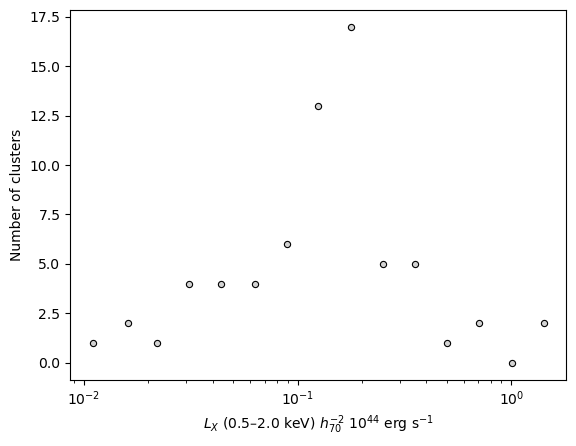

In [59]:
plt.scatter(Lx_c, N_obs, facecolors = 'lightgrey', edgecolors = 'black', s = 20, linewidth = 0.8, zorder = 3)
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel("Number of clusters")
plt.xscale("log")

In [60]:
z_mask = Lx_z["z"]<0.3
Lx = Lx[z_mask]
Lx_err = Lx_z["Lxerr"]
Lx

0     0.031099
1     0.014380
2     0.009963
3     0.043801
4     0.015892
        ...   
62    0.207074
63    0.195979
64    0.174827
65    1.484490
66    0.244431
Name: Lx, Length: 67, dtype: float64

In [61]:
num_bins = 15
bin_edges = np.logspace(np.log10(Lx.min()*0.9), np.log10(Lx.max()*1.1), num_bins + 1)
bin_edges

array([0.00896684, 0.0126861 , 0.01794803, 0.0253925 , 0.03592478,
       0.05082564, 0.07190707, 0.10173263, 0.14392922, 0.20362808,
       0.2880888 , 0.40758207, 0.57663868, 0.81581648, 1.15420027,
       1.63293866])

In [62]:
binned_counts, _ = np.histogram(Lx, bins=bin_edges)

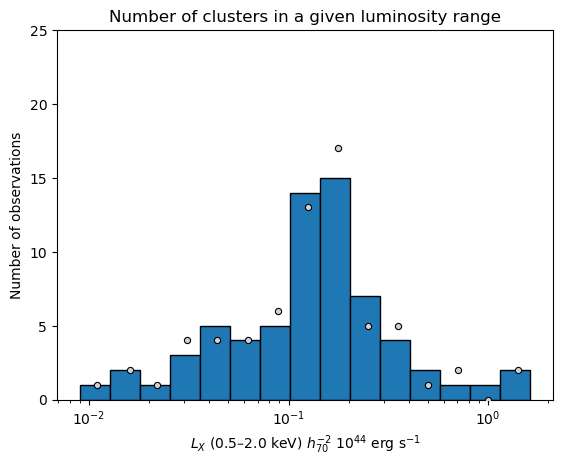

In [63]:
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.bar(bin_centers, binned_counts, width=np.diff(bin_edges), align='center', edgecolor='black')
plt.scatter(Lx_c, N_obs, facecolors = 'lightgrey', edgecolors = 'black', s = 20, linewidth = 0.8, zorder = 3)
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel('Number of observations')
plt.ylim(0, 25)
plt.xscale("log")
plt.title('Number of clusters in a given luminosity range')
plt.savefig("figures/N-Luminosity.png")
plt.show()

In [64]:
bin_width = bin_edges[1:] - bin_edges[:-1]
bin_width

array([0.00371926, 0.00526193, 0.00744447, 0.01053228, 0.01490086,
       0.02108142, 0.02982556, 0.04219659, 0.05969886, 0.08446072,
       0.11949327, 0.16905661, 0.23917779, 0.33838379, 0.47873839])

In [65]:
delta_Lx = bin_width
#V_max = [i for i in V_max if i > 0]
#V_max

In [66]:
Lx_z.columns

Index(['Lx', 'z', 'Lxerr', 'Vmax_good'], dtype='object')

In [67]:
phi = []
z_mask = Lx_z['z'] <= 0.3
Lx_mask = Lx_z["Lx"][z_mask]#*1e44
# V_max_bad = Lx_z["V_max_bad"][z_mask]
Vmax_good = Lx_z["Vmax_good"][z_mask]
# L_masked = Lx_z['Lx']
len(Vmax_good), len(Lx)
# plt.scatter(Lx_z['V_max_bad'], Lx_z['Vmax_good'])
# plt.loglog()

(67, 67)

In [68]:
Vmax_errs_arr = np.array(Vmax_errs)

In [71]:
# VMAX GRAPH
phi = []
phi_errs = []
deltas = []
# print(Vmax_good)
for i, lower_bin_edge in enumerate(bin_edges[:-1]):
    upper_bin_edge = bin_edges[i+1]
    indecis_in_bin = np.where((lower_bin_edge <= Lx_mask) & (Lx_mask < upper_bin_edge))[0]
    # print(indecis_in_bin)
    delta_L = upper_bin_edge - lower_bin_edge
    deltas.append(delta_L)
    # print(Vmax_good[indecis_in_bin])
    new_phi = 1/delta_L * np.sum(1/Vmax_good[indecis_in_bin])
    
    phi_Vmax_err_inside = Vmax_errs_arr[indecis_in_bin] / ((Vmax_good[indecis_in_bin])**2)
    phi_Vmax_err = np.sqrt(np.sum(phi_Vmax_err_inside**2)) * 1/delta_L

    phi_poisson_err = new_phi / np.sqrt(len(indecis_in_bin))

    phi_err = np.sqrt((phi_Vmax_err**2) + (phi_poisson_err**2))

    # print(new_phi)
    phi.append(new_phi)
    phi_errs.append(phi_err)
    #print(phi_errs)
    #print(lower_bin_edge, upper_bin_edge)
    #print(Lx_mask[indecis_in_bin])
    

phi_errs

[np.float64(0.001131050170967483),
 np.float64(0.0006435466001083608),
 np.float64(0.0001629794556974061),
 np.float64(0.00015371831176865512),
 np.float64(9.670224374765503e-05),
 np.float64(3.828590913269668e-05),
 np.float64(1.9243374760014527e-05),
 np.float64(2.108272045340462e-05),
 np.float64(1.5424738445192788e-05),
 np.float64(7.447877062763614e-06),
 np.float64(3.9794657892834215e-06),
 np.float64(1.9889372341765745e-06),
 np.float64(9.940709459412898e-07),
 np.float64(7.026332233363879e-07),
 np.float64(7.023522522177017e-07)]

[0.01082647 0.01531706 0.02167027 0.03065864 0.04337521 0.06136635
 0.08681985 0.12283093 0.17377865 0.24585844 0.34783544 0.49211038
 0.69622758 0.98500837 1.39356947]


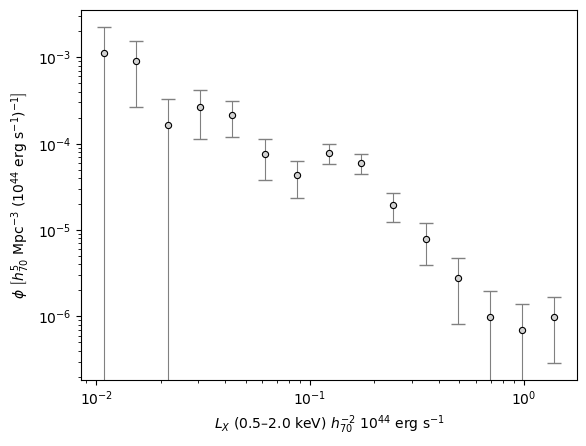

In [72]:
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
print(bin_centers)
#plt.bar(bin_centers, binned_counts, width=np.diff(bin_edges), align='center', edgecolor='black')
plt.errorbar(bin_centers, np.array(phi), np.array(phi_errs), fmt='none', ecolor='gray', capsize=5, linewidth = 0.8, linestyle='None')
plt.scatter(bin_centers, np.array(phi), facecolors = 'lightgrey', edgecolors = 'black', s = 20, linewidth = 0.8, zorder = 3)
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel(r"$\phi\ \left[h_{70}^{5}\ \mathrm{Mpc}^{-3}\ (10^{44}\ \mathrm{erg\ s}^{-1})^{-1}\right]$")
plt.loglog()
plt.savefig("figures/newphi.png")
plt.show()


### 4b. Page-Carrera method

Alternatively, Page & Carrera (2000) provide an estimate of $\phi$, which expression is obtained by integrating the XLF definition and noting that $\phi$ changes little compared to the survey volume element in the volume-luminosity plane, such that it can be taken out of the integral, giving:

$$\phi(L_{\text{X}_j},z) = \frac{N_j}{\int_{L_{\text{X,min}}}^{L_{\text{X,max}}}\int_{z_{\text{min}}}^{z_{\text{max}}}\Omega(f_{\text{X}},r_{\theta})\frac{\mathrm{d}V(z)}{\mathrm{d}z}\mathrm{d}z\mathrm{d}L_{\text{X}}}$$

where $L_{\text{X}_j}$ is the bin centre and $N_j$ is the number of clusters in the $j$-th bin.

In [73]:
from scipy.integrate import dblquad
from scipy.interpolate import interp1d
import tqdm

In [74]:
z_fullrange = np.arange(0.02, 0.33, 0.01) # np.arange ignores upper point so put 0.31

In [75]:
co_mo_vol_range = cosmo.differential_comoving_volume(z_fullrange).value

In [76]:
co_mo_vol_range_interp = interp1d(z_fullrange, co_mo_vol_range)

In [77]:
DL_cm_range = cosmo.luminosity_distance(z_fullrange).to(u.cm).value

In [78]:
DL_cm_range_interp = interp1d(z_fullrange, DL_cm_range)

In [79]:
coverage_interp1d = interp1d(flux*1e-14, coverage, bounds_error = False, fill_value = ([0], [100]))
# plt.plot(flux*1e-14, coverage_interp1d(flux*1e-14))

Note that this method works fine but takes a long time to run, see later cached method for shorter runtime with still reasonable precision.

In [80]:
def pc_integrand(z, Luminosity, flux, coverage):
    # 
    co_mo_vol_step = co_mo_vol_range_interp(z)
   
    DL_cm_step = DL_cm_range_interp(z)
    flux_range = ( Luminosity / (4 * np.pi * DL_cm_step**2) ) * kcorr_interp(Luminosity, z)
    #print(flux_range)
    flim = 6.5e-14
    if flux_range >= flim:
        # coverage_interp = np.interp(flux_range, flux*1e-14, coverage, left = 0, right = 100)
        coverage_interp = coverage_interp1d(flux_range)
    else:
        coverage_interp = 0
    # print(coverage_interp* co_mo_vol_interp)
    # raise
    return (coverage_interp * co_mo_vol_step)
# pc_integrand(0.1, 1e43, flux, coverage)

In [81]:
pc_denoms = []
pc_denoms_errs = []
print(L_range[0], L_range[123])

0.031098562755102 4.22355989795918


In [82]:
# denominator = dblquad(pc_integrand, L_range[0], L_range[123], 0.02, 0.3, args=(flux, coverage))
# pc_denoms.append(denominator[0])
# pc_denoms_errs.append(denominator[1])
# print(denominator)

In [83]:
z_mask = Lx_z['z'] <= 0.3
Lx_mask = Lx_z["Lx"][z_mask] * 1e44
# pc_denoms = Lx_z["pc_denoms"][z_mask]

In [84]:
num_bins = 15
bin_edges = np.logspace(np.log10(Lx_mask.min()*0.9), np.log10(Lx_mask.max()*1.1), num_bins + 1)
bin_edges

array([8.96683913e+41, 1.26860985e+42, 1.79480296e+42, 2.53925009e+42,
       3.59247849e+42, 5.08256424e+42, 7.19070672e+42, 1.01732631e+43,
       1.43929221e+43, 2.03628084e+43, 2.88088800e+43, 4.07582073e+43,
       5.76638683e+43, 8.15816478e+43, 1.15420027e+44, 1.63293866e+44])

In [265]:
pc_phis = []
pc_deltas = []
pc_phis_errs = []
for i, lower_bin_edge in enumerate(tqdm.tqdm(bin_edges[:-1])):
    upper_bin_edge = bin_edges[i+1]
    indecis_in_bin = np.where((lower_bin_edge <= Lx_mask) & (Lx_mask < upper_bin_edge))[0]
    delta_L = upper_bin_edge - lower_bin_edge
    deltas.append(delta_L)
   # print(Vmax_good[indecis_in_bin])
   # print(lower_bin_edge, upper_bin_edge)
    pc_denoms, pc_denoms_err = dblquad(pc_integrand, lower_bin_edge, upper_bin_edge, 0.02, 0.3, args=(flux, coverage))
    #print(pc_denoms)
    clust_in_bin = len(indecis_in_bin)
    pc_phi = clust_in_bin / pc_denoms 
    # pc_phi_errs = clust_in_bin /
    # new_phi = 1/delta_L * np.sum(1/Vmax_good[indecis_in_bin])
    # print(new_phi)
    pc_phis.append(pc_phi)
    # pc_phi_errs.append(pc)
    #print(lower_bin_edge, upper_bin_edge)
    #print(Lx_mask[indecis_in_bin])
    
#pc_phis

100%|██████████| 15/15 [4:08:08<00:00, 992.55s/it]   


In [85]:
#%pip install tqdm

In [86]:
# np.savetxt("data/koens_2013/pc_phis.txt", pc_phis)

In [87]:
#len(bin_centers)
print(pc_phis)

NameError: name 'pc_phis' is not defined

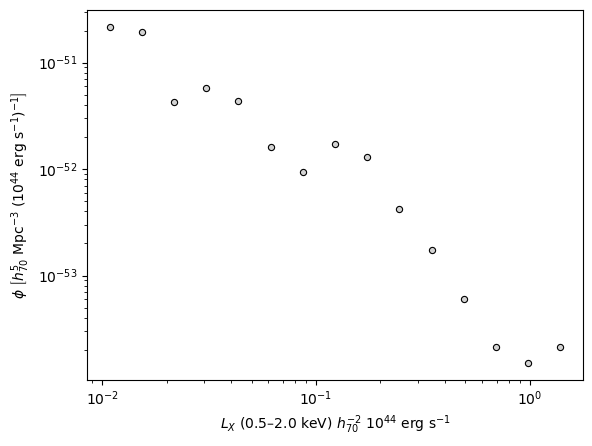

In [169]:
plt.scatter(bin_centers, pc_phis, facecolors = 'lightgrey', edgecolors = 'black', s = 20, linewidth = 0.8, zorder = 3)
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel(r"$\phi\ \left[h_{70}^{5}\ \mathrm{Mpc}^{-3}\ (10^{44}\ \mathrm{erg\ s}^{-1})^{-1}\right]$")
plt.loglog()
plt.savefig("figures/pc_phi-L.png")
plt.show()

Faster cached method:

In [88]:
# HACK: Use caching so to avoid recomputing similar values
# TODO: Check impact of number of cache points, is it precise enough?
# Set number of points for caching z and Lx 
cache_z_grid_points = 100  
cache_Lx_grid_points = 500  

# Cache interpolator results for z and Lx
# Create meshgrid for Lx and z for caching
cache_z = np.linspace(0.02, 0.31, cache_z_grid_points)
cache_Lx = np.logspace(np.log10(Lx_mask.min()), np.log10(Lx_mask.max()), cache_Lx_grid_points)
cache_Lx_grid, cache_z_grid = np.meshgrid(cache_Lx, cache_z)
cache_kcorr = kcorr_interp(cache_Lx_grid, cache_z_grid)
cache_DL_cm = DL_cm_range_interp(cache_z)
cache_co_mo_vol = co_mo_vol_range_interp(cache_z)



In [89]:
# Helper function to get cached kcorr value
def get_kcorr_cached(Lx, z):
    """
    Return cached kcorr value for given Lx and z by nearest neighbor lookup.
    """
    i = np.abs(cache_Lx - Lx).argmin()
    j = np.abs(cache_z - z).argmin()
    return cache_kcorr[j, i]

# Helper function to get cached DL_cm and co_mo_vol
def get_DL_cm_cached(z):
    j = np.abs(cache_z - z).argmin()
    return cache_DL_cm[j]
def get_co_mo_vol_cached(z):
    j = np.abs(cache_z - z).argmin()
    return cache_co_mo_vol[j]

# HACK: Increase integration tolerances for dblquad, check impact
integration_opts = dict(epsabs=1e-2, epsrel=1e-2)  

In [90]:
pc_phis = []
pc_errs = []
pc_deltas = []
for i, lower_bin_edge in enumerate(tqdm.tqdm(bin_edges[:-1])):
    upper_bin_edge = bin_edges[i+1]
    indecis_in_bin = np.where((lower_bin_edge <= Lx_mask) & (Lx_mask < upper_bin_edge))[0]
    clust_in_bin = len(indecis_in_bin)
    delta_L = upper_bin_edge - lower_bin_edge
    pc_deltas.append(delta_L)
    def pc_integrand_fast(z, Luminosity):
        """
        Fast integrand using cached interpolator results.
        """
        co_mo_vol_step = get_co_mo_vol_cached(z)
        DL_cm_step = get_DL_cm_cached(z)
        kcorr_val = get_kcorr_cached(Luminosity, z)
        flux = (Luminosity / (4 * np.pi * DL_cm_step**2)) * kcorr_val
        flim = 6.5e-14
        if flux >= flim:
            coverage_interp = coverage_interp1d(flux)
        else:
            coverage_interp = 0

        survey_area = ((coverage_interp/100)*tot_cov).value
        
        return (survey_area * co_mo_vol_step)
    # Use increased tolerances for faster integration
    
    pc_denoms, pc_denoms_err = dblquad(pc_integrand_fast, lower_bin_edge, upper_bin_edge, 0.02, 0.3, **integration_opts)
    pc_phi = clust_in_bin / pc_denoms
    pc_poisson_err = pc_phi / np.sqrt(len(indecis_in_bin))
    
    pc_phis.append(pc_phi)
    pc_errs.append(pc_poisson_err)

  0%|          | 0/15 [00:00<?, ?it/s]C:\Users\LilyO\OneDrive - University of Bristol\Documents\Lily\coding\envs\eRASS_XLF\Lib\site-packages\scipy\integrate\_quadpack_py.py:1264: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
100%|██████████| 15/15 [08:19<00:00, 33.30s/it]


In [91]:
pc_phis

[1.004967408385546e-47,
 8.878550638192548e-48,
 1.979338313356155e-48,
 2.6720927957249708e-48,
 2.0201878581431573e-48,
 7.401619786258093e-49,
 4.374836127268606e-49,
 7.885198753999907e-49,
 5.97152130029181e-49,
 1.9697135257155804e-49,
 7.955661913114667e-50,
 2.811626472239809e-50,
 9.93662564565353e-51,
 7.0234456957008e-51,
 9.928680258179079e-51]

In [93]:
# Store the results in a DataFrame with bin centres and edges
pc_bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
pc_df = pd.DataFrame({
    'bin_centre': pc_bin_centres,
    'bin_edge_lower': bin_edges[:-1],
    'bin_edge_upper': bin_edges[1:],
    'phi': pc_phis,
    'delta_L': pc_deltas
})
pc_df.to_csv('results_carrera_xlf.csv', index=False)

In [94]:
pc_df = pd.read_csv('results_carrera_xlf.csv')
pc_df.head()

,bin_centre,bin_edge_lower,bin_edge_upper,phi,delta_L
0,1.082647e+42,8.966839e+41,1.268610e+42,1.004967e-47,3.719259e+41
1,1.531706e+42,1.268610e+42,1.794803e+42,8.878551e-48,5.261931e+41
2,2.167027e+42,1.794803e+42,2.539250e+42,1.979338e-48,7.444471e+41
3,3.065864e+42,2.539250e+42,3.592478e+42,2.672093e-48,1.053228e+42
4,4.337521e+42,3.592478e+42,5.082564e+42,2.020188e-48,1.490086e+42


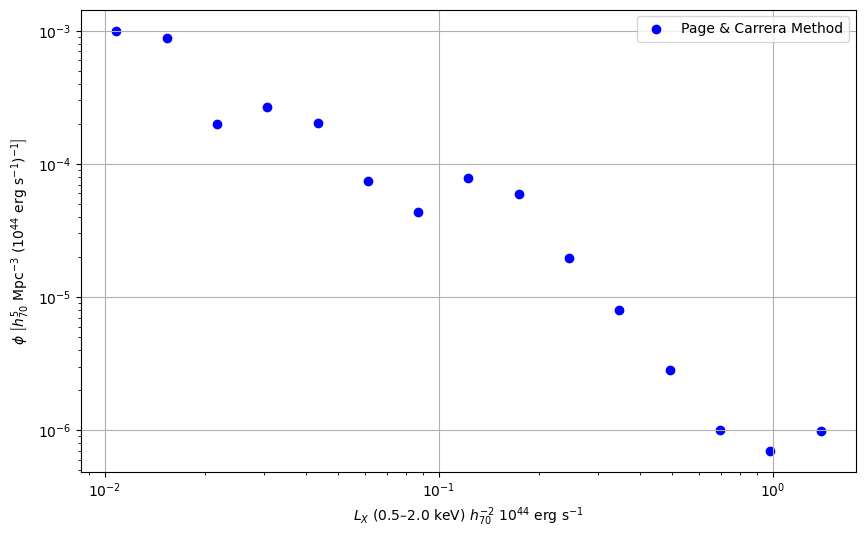

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(pc_df['bin_centre']/1e44, pc_df['phi']*1e44, label='Page & Carrera Method', color='blue', marker='o')

# plt.scatter(bin_centers, np.array(pc_phis)*1e44, facecolors = 'lightgrey', edgecolors = 'black', marker = "^", s = 20, linewidth = 0.8, zorder = 3)

plt.loglog()
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel(r"$\phi\ \left[h_{70}^{5}\ \mathrm{Mpc}^{-3}\ (10^{44}\ \mathrm{erg\ s}^{-1})^{-1}\right]$")
plt.legend()
plt.grid()
plt.savefig('figures/xlf_page_carrera.png')
plt.show()

In [97]:
# Schechter function for WARPS (using Bayesian fit parameters)

phi_star = 3.68
alpha = 1.79
Lx_star = 2.59
def schechterfunction(Lx):
    return (phi_star * ((Lx/Lx_star)**-alpha) * np.exp(-Lx/Lx_star) * 1/Lx_star)*1e-7

Lums = np.arange(1e-2, 1e2, 1e-2)
eq2_phi = schechterfunction(Lums)

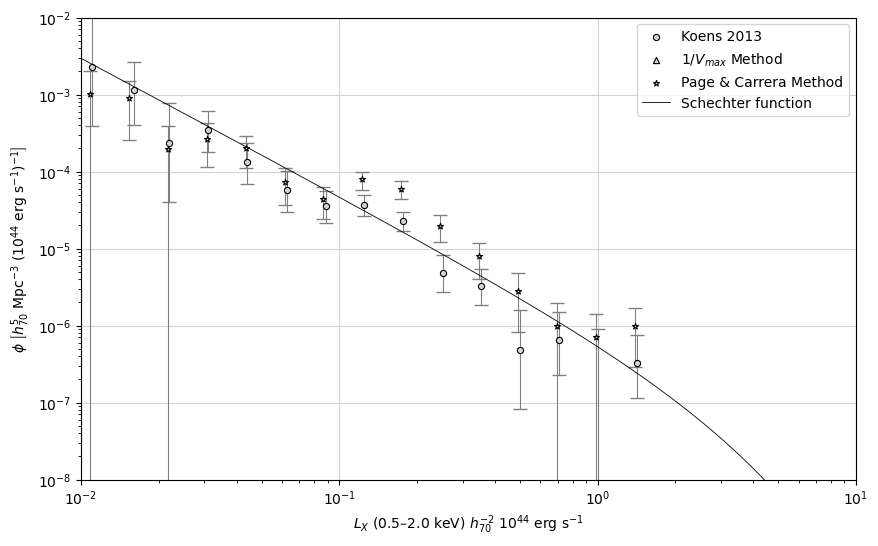

In [98]:
plt.figure(figsize=(10, 6))

# Koens XLF
plt.errorbar(Lx_c, phi1, yerr, fmt='none', ecolor='gray', capsize=5, linewidth = 0.8, linestyle='None')
plt.scatter(Lx_c, phi1, facecolors = 'lightgrey', edgecolors = 'black', label = 'Koens 2013', s = 20, linewidth = 0.8, zorder = 3)

# 1/Vmax XLF
plt.errorbar(bin_centers/1e44, np.array(phi), np.array(phi_errs), fmt='none', ecolor='gray', capsize=5, linewidth = 0.8, linestyle='None')
plt.scatter(bin_centers/1e44, np.array(phi), facecolors = 'lightgrey', edgecolors = 'black', label=r'$1/V_{max}$ Method', marker = "^", s = 20, linewidth = 0.8, zorder = 3)

# Page-Carrera XLF
plt.errorbar(pc_df['bin_centre']/1e44, pc_df['phi']*1e44, np.array(pc_errs)*1e44, fmt='none', ecolor='gray', capsize=5, linewidth = 0.8, linestyle='None')
plt.scatter(pc_df['bin_centre']/1e44, pc_df['phi']*1e44, facecolors = 'lightgrey', edgecolors = 'black', label='Page & Carrera Method', marker='*',  s = 20, linewidth = 0.8, zorder = 3)

plt.plot(Lums, eq2_phi, color = "black" , label = 'Schechter function', linewidth = 0.6, zorder = 3)

plt.loglog()
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel(r"$\phi\ \left[h_{70}^{5}\ \mathrm{Mpc}^{-3}\ (10^{44}\ \mathrm{erg\ s}^{-1})^{-1}\right]$")
plt.xlim(1e-2, 1e1)
plt.ylim(1e-8, 1e-2)
plt.legend()
plt.grid(True, color = 'lightgrey', zorder = 0)
plt.savefig('figures/all_xlfs.png')
plt.show()

## 6. Expected vs Observed numbers

The expected number of objects in the luminosity-redshift plane is obtained by integrating the XLF definition:

$$N_{\text{exp}} = \int_{L_{\text{X,min}}}^{L_{\text{X,max}}} \int_{z_{\text{min}}}^{z_{\text{max}}} \phi(L_{\text{X}},z) \Omega(f_{\text{X}},r_{\theta}) \frac{\mathrm{d}V(z)}{\mathrm{d}z} \mathrm{d}z\mathrm{d}L_{\text{X}}$$

As mentioned earlier, the XLF changes little compared to the volume element. Hence we can predict the number of clusters for any of the WARPS subsets based on the local reference XLF $\phi_{\text{local}}$, the observed XLF for the subset $\phi_{\text{observed}}$, and the number of clusters observed in that subset $N_{\text{observed}}$:

$$N_{\text{exp}} \approx N_{\text{observed}} \times \frac{\phi_{\text{local}}}{\phi_{\text{observed}}}$$

If the local reference XLF is a good description of the WARPS XLF, and there is no evolution, then $N_{\text{exp}}$ should be consistent with $N_{\text{observed}}$ for all subsets.

![Expected vs Observed Numbers](figures/koens_2013/nexpected.png)

In [99]:
Luminosity = Lx_z["Lx"]*1e44
phi_star = 3.68*1e-7
# phi_star = 2.94*1e-7
alpha = 1.79
# alpha = 1.69
Lx_star = 2.59*1e44
# Lx_star = 2.64*1e44

In [100]:
import tqdm
from scipy.integrate import dblquad

In [101]:
N_exp = []
N_exp_errs = []
expect_deltas = []
for i, lower_bin_edge in enumerate(tqdm.tqdm(bin_edges[:-1])):
    upper_bin_edge = bin_edges[i+1]
    indecis_in_bin = np.where((lower_bin_edge <= Lx_mask) & (Lx_mask < upper_bin_edge))[0]
    clust_in_bin = len(indecis_in_bin)
    delta_L = upper_bin_edge - lower_bin_edge
    expect_deltas.append(delta_L)
    
    def Nexp_integrand(z, Luminosity):
    
        co_mo_vol_step = get_co_mo_vol_cached(z)
        DL_cm_step = get_DL_cm_cached(z)
        kcorr_val = get_kcorr_cached(Luminosity, z)
        flux = (Luminosity / (4 * np.pi * DL_cm_step**2)) * kcorr_val
        
        flim = 6.5e-14
        if flux >= flim:
            coverage_interp = coverage_interp1d(flux)
        else:
            coverage_interp = 0
        # print("Flux test:", flux, flim)

        eq1_phi = (phi_star * ((Luminosity/Lx_star)**-alpha) * np.exp(-Luminosity/Lx_star) * 1/Lx_star)
        

        survey_area = ((coverage_interp/100)*tot_cov).value
        
        return (eq1_phi * survey_area * co_mo_vol_step)

        
    Nexp, Nexp_err = dblquad(Nexp_integrand, lower_bin_edge, upper_bin_edge, 0.02, 0.3, **integration_opts)
    # Nexp_poisson_err = Nexp / np.sqrt(len(indecis_in_bin))
    
    N_exp.append(Nexp)
    N_exp_errs.append(Nexp_err)

100%|██████████| 15/15 [00:14<00:00,  1.06it/s]


In [102]:
N_exp

[2.5457843430820493,
 3.100379313648759,
 3.7000168202582895,
 4.4649258808626975,
 5.194701327117418,
 6.101791041696634,
 6.936190071999892,
 5.795124195704883,
 4.321495593470925,
 3.1968869488175224,
 2.338329138006802,
 1.683201687438655,
 1.184535642036509,
 0.8074046661115558,
 0.5260866799687098]

In [104]:
Nexp_bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2
N_df = pd.DataFrame({
    'bin_centre': Nexp_bin_centres,
    'bin_edge_lower': bin_edges[:-1],
    'bin_edge_upper': bin_edges[1:],
    'N_exp': N_exp,
    'delta_L': expect_deltas
})
N_df.to_csv('expected_observations.csv', index=False) 

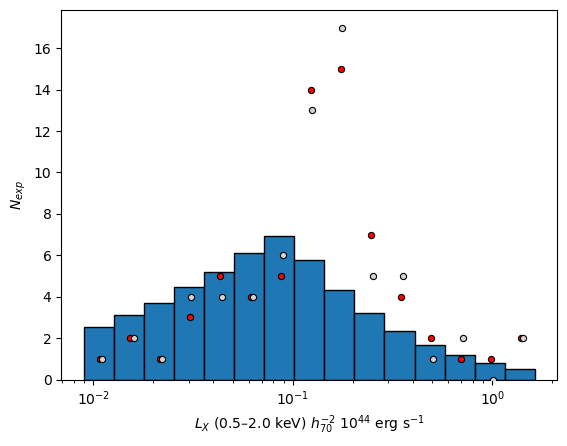

In [106]:
# N_exp is offset by two bins when compared to N_obs, unsure as to why this is but wasn't vital to project to look further into it
plt.bar(Nexp_bin_centres/1e44, N_exp, width=np.diff(bin_edges/1e44), align='center', edgecolor='black')
plt.scatter(bin_centers, binned_counts, facecolors = 'red', edgecolors = 'black', s = 20, linewidth = 0.8, zorder = 3)
plt.scatter(Lx_c, N_obs, facecolors = 'lightgrey', edgecolors = 'black', s = 20, linewidth = 0.8, zorder = 3)
plt.xlabel(r"$L_X\ (0.5$–$2.0\ \mathrm{keV})\ h_{70}^{-2}\ 10^{44}\ \mathrm{erg\ s}^{-1}$")
plt.ylabel(r'$N_{exp}$')
# plt.xlim(1e-2, 1e1)
# plt.ylim(0, 20)
plt.xscale("log")
plt.savefig("figures/N-Luminosity.png")
plt.show()